# STAT207 Final Project - Red Wine Quality

Aisaiah Pellecer

**Red Wine Quality** 'The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
   For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
   Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables 
   are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

   These datasets can be viewed as classification or regression tasks.
   The classes are ordered and not balanced (e.g. there are munch more normal wines than
   excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
   or poor wines. Also, we are not sure if all input variables are relevant. So
   it could be interesting to test feature selection methods.'' -UCI Machine Learning Repositiry

Source: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wine+quality)

## 1. Introduction

In [278]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import statsmodels.api as sm
import statsmodels.formula.api as smf


* A. **Title:** Physicochemical Properties of High-Quality Red Wine 
* B. **Motivation:** The reason why I chose this project is because like many individuals, I like red wine. In addition, I plan on going wine-tasting this summer. However, like most individuals, I have no idea what constitutes a good tasting wine. This project would be an opportunity for me to learn about the qualities that make up high-quality wine and may provide insights that local wineries can use to improve their processes and the qualities of their wine. 
* C. **Research Questions:** What are the attributes that contribute to red wine of high quality? The purpose behind this research is to isolate the main qualities that contribute to the quality of red wine. Research in this area may be used to tailor vinification processes of wineries and enable them to produce wine of high-quality. 
* D. **Dataset:** Display at least 6 observations from your dataframe in this section and show how many rows and columns it has.


In [279]:
#D. Dataset: Displaying 6 Observations from my dataframe
df = pd.read_csv('winequality-red.csv', sep =r';', engine = 'python',)
df['classification'] = ['High' if x > 6 else 'Low' for x in df.quality]
df.head(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,classification
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Low
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Low
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,Low


In [280]:
#D. Dataset: Displaying how many rows and columns it has
shape = df.shape
print(f'Columns: {shape[1]}')
print(f'Rows: {shape[0]}')

Columns: 13
Rows: 1599


* E. **Think Critically:**  While the aim of this researh is to undersatnd that qualities that may contribute to high-quality wine, there is limitation from the fact that the dataset is related to the Portugese 'Vinho Verde' Wine and because the dataset is comprised of only physicochemical (inputs) and sensory (the output) variables. What this means is that there are variables that pertain to the types of grapes used and also variables about their cultivatation (climate conditions, soil quality, and etc.). These variables may be contributing factors to the quality of wine, and therefore are limitations to this dataset. In addition a greater limitation to this dataset is the fact that there is no direct metadata that describes the units of the values and the processes used to collect the data.

## 2. Descriptive Analytics

### **Research Question**: What physiochemical attributes from the dataset determine the quality of red wine?

* **A. Goal:** What is the relationship between Alcohol and Wine Quality in this dataset? Furthermore, how does this relationship between Alcohol and Wine Quality change for different values of Sulphates?



Text(0.5, 1.0, 'Correlation Heatmap of Wine features and Quality')

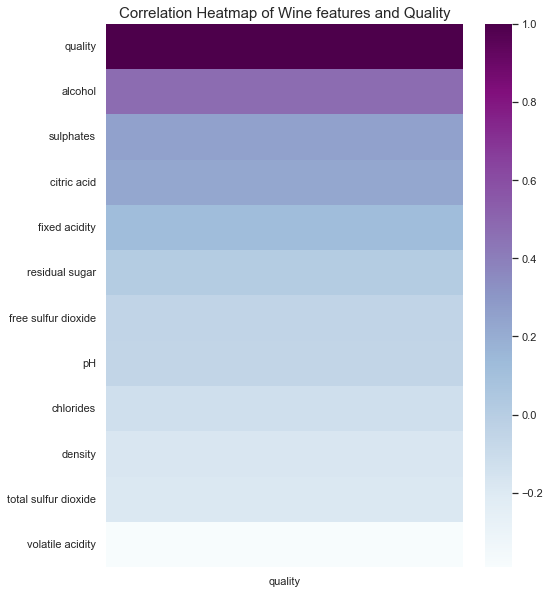

In [281]:
#One visualization that incorporates 3 or more variables in the same plot.
font = {
        'size': 15,
        }
plt.figure(figsize=(8,10))

sns.heatmap(df.corr()[['quality']].sort_values(by='quality', ascending=False),cmap='BuPu')
plt.title('Correlation Heatmap of Wine features and Quality', fontdict= font)

Text(0.5, 1.0, 'The relationship between Alcohol and Suphate Content by Quality')

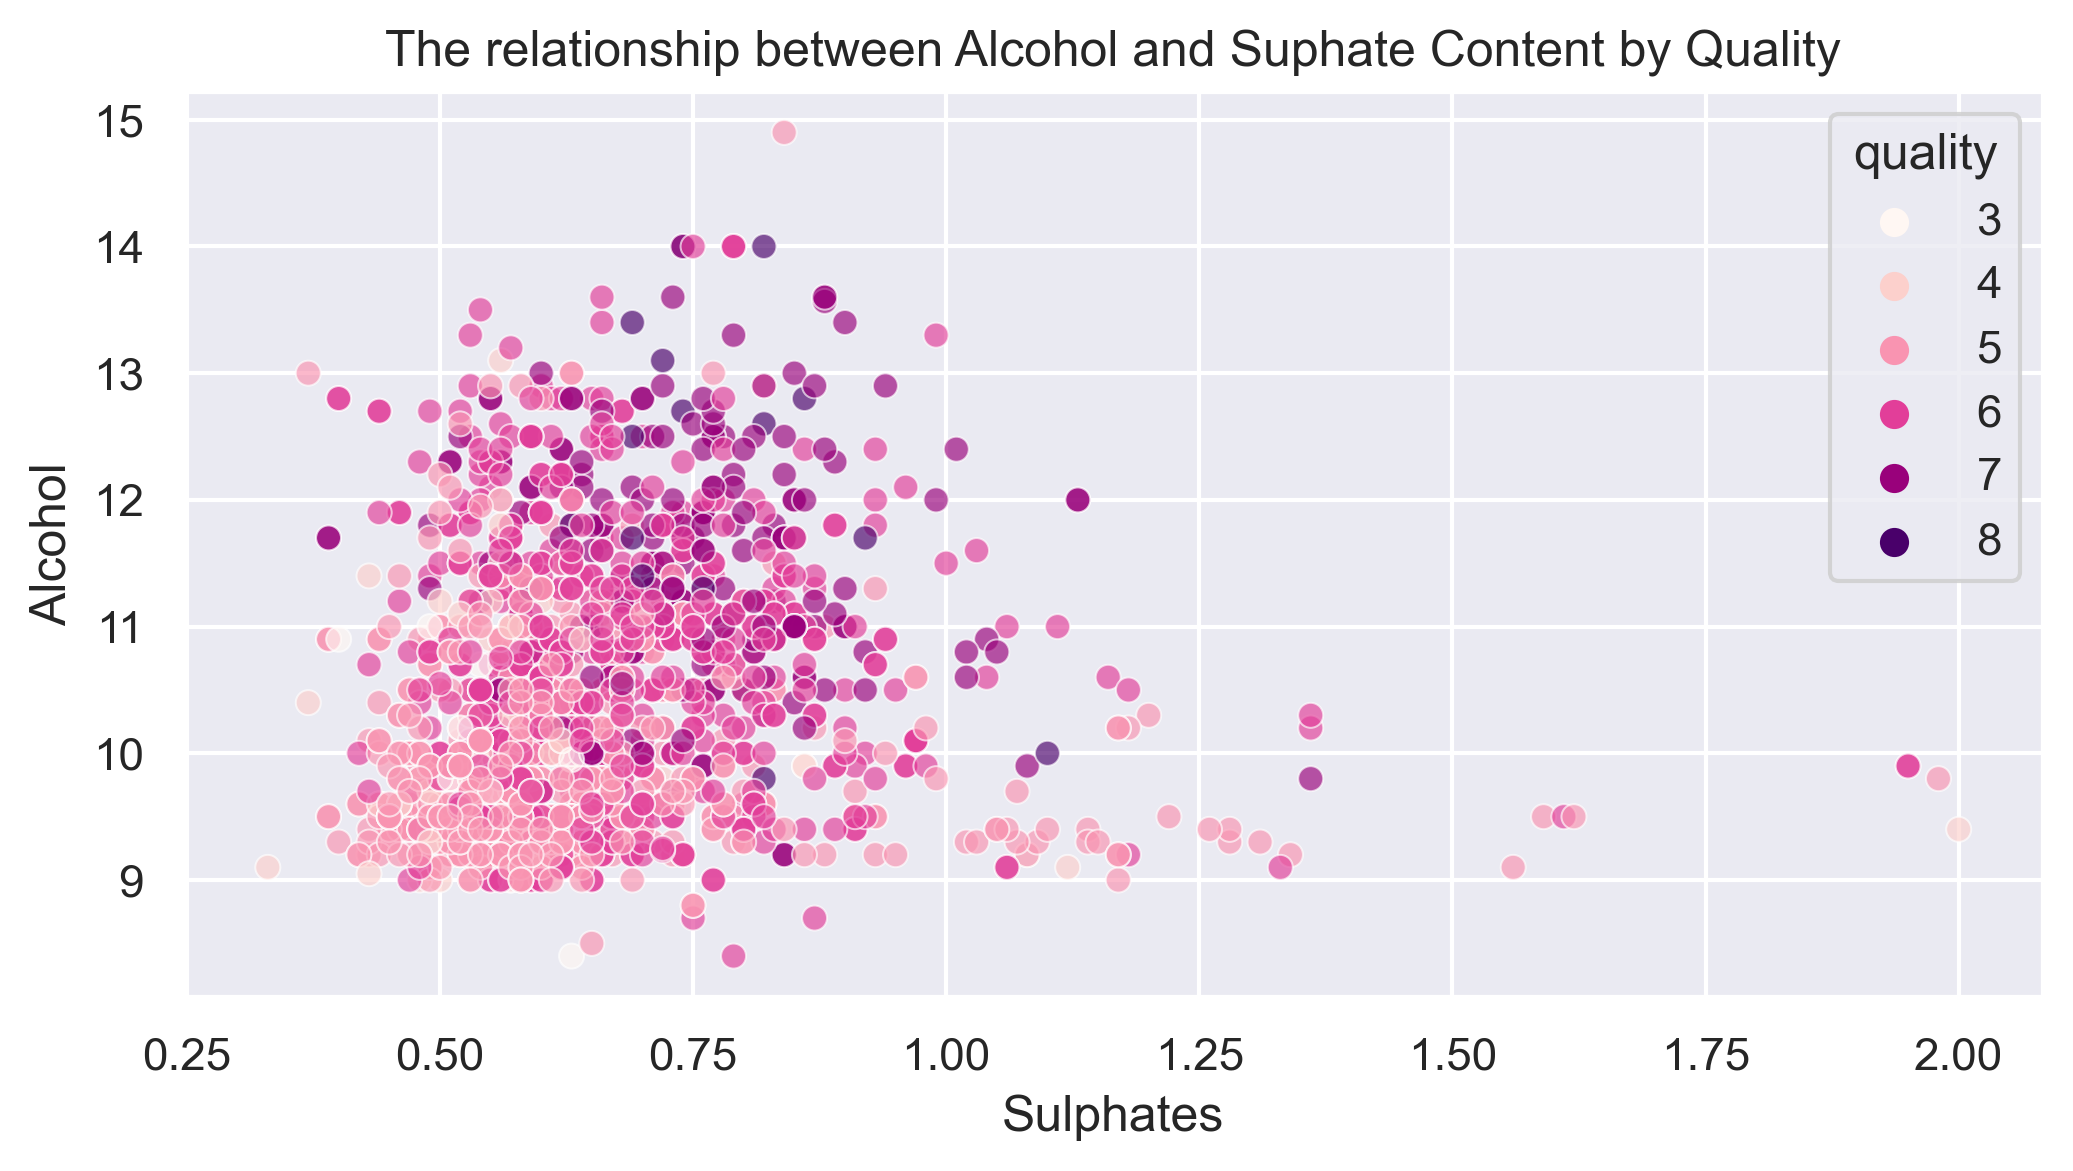

In [282]:
plt.figure(dpi = 300, figsize=(8,4))
# sns.color_palette("hls", 8)
sns.scatterplot(x ='sulphates',y= 'alcohol', hue='quality', data = df, alpha = 0.66, palette ='RdPu')
plt.xlabel('Sulphates')
plt.ylabel('Alcohol')
plt.title('The relationship between Alcohol and Suphate Content by Quality')

In [283]:
df[df['quality']==8][['sulphates','alcohol']].describe()

,sulphates,alcohol
count,18.000000,18.000000
mean,0.767778,12.094444
std,0.115379,1.224011
min,0.630000,9.800000
25%,0.690000,11.325000
50%,0.740000,12.150000
75%,0.820000,12.875000
max,1.100000,14.000000


In [284]:
df[df['quality']==3][['sulphates','alcohol']].describe()


,sulphates,alcohol
count,10.00000,10.000000
mean,0.57000,9.955000
std,0.12202,0.818009
min,0.40000,8.400000
25%,0.51250,9.725000
50%,0.54500,9.925000
75%,0.61500,10.575000
max,0.86000,11.000000


* e. Describe what you see in your visualization and summary statistics, what they tell you, and how they help answer your research question.


Based on the correlation heatmap visualization, it appears that alcohol, sulphates, and citric acids are the physicochemical attributes that are highly correlated with the quality of red wine. To gain a deeper understanding of the relationship between alcohol and sulphate content and how it varies across wine quality, I created a scatterplot. From this visualization, I was able to assume that there is a positive, weak, relationship between alcohol and sulphate content. Specifically, when sulphate content increases, alcohol content also increases to some extent, leading to an improvement in the quality of the wine.

The summary statistics further support these findings, indicating that the highest quality wines (rated 8) had an average sulphate content of 0.768 and an alcohol content of 12%. Conversely, the lowest quality wines (rated 3) had an average sulphate content of 0.57 and an alcohol content of 9.95%. These results underscore the importance of carefully controlling the sulphate and alcohol content during the wine-making process, as these attributes play a key role in determining the quality of the final product.

Overall, these descriptive analytics offer valuable insights into the physicochemical attributes that are most critical for producing high-quality red wine. By isolating and carefully controlling these attributes, winemakers can increase the likelihood of producing wines of superior quality.

## 3. Inference

### Inference Research Question: Is there an association between average alcohol content and the classification of wine in my population 
 * Difference in population means: Is there a difference in the alcohol among wines classifed as 'High quality' and wines classified as 'Low Quality'.
    * Stating it as a research question
        * $H_0$: $\mu_1$ - $\mu_2$ = 0
        * $H_1$: $\mu_1$ - $\mu_2$ $\neq$ 0
            * Where 1 = Low Quality and 2 = High Quality




In [285]:
df['classification'].value_counts()

Low     1382
High     217
Name: classification, dtype: int64

### Checking Assumptions for Difference of Two Population Means:

We can check the same assumptions for the CLT for each of our two sampling distributions.  These are the same assumptions used for the confidence interval above.

1. Sample with 'Low Quality' red wine is randomly sampled.
2. Sample with 'High Quality' red wine is randomly sampled.
3. $n_{1}=1382<10$% of all 'Low Quality' red wines.
4. $n_{2}=217<10$% of all 'High Quality' red wines.
5. $n_{1}=1382>30$ OR <s>the population (or sample) distribution of 'Low Quality' red wine is approximately normal.</s>
5. $n_{2}=217>30$ OR <s>the population (or sample) distribution of 'High Quality' red wine is approximately normal.</s>
6. We can assume that there is no pairwise relationship between the red wines in both groups in this sample.


All of the conditions are met, so we can proceed with conducting this hypothesis test.

In [286]:
alco_lo = df[df['classification']=='Low']['alcohol']
alco_hi = df[df['classification']=='High']['alcohol']

mean_lo = alco_lo.mean()
std_lo = alco_lo.std()
n_low = len(alco_lo)

mean_hi = alco_hi.mean()
std_hi = alco_hi.std()
n_hi = len(alco_hi)

point_estimate= mean_lo-mean_hi
print('Point Estimate: ', point_estimate)
standard_error= np.sqrt((std_lo**2)/n_lo + (std_hi**2)/n_hi)
print('Standard Error: ', standard_error)

test_stat=(point_estimate-0)/standard_error
print('Test statistic (ie. t-score of the point estimate):',test_stat)

Point Estimate:  -1.2670120109105412
Standard Error:  0.07260607760773001
Test statistic (ie. t-score of the point estimate): -17.450495229281586


In [287]:
pvalue= 2*(1-t.cdf(np.abs(test_stat), df=216))
print('p-value: ',pvalue)

p-value:  0.0


### Make a Conclusion with our p-value, using a significance level of $\alpha=0.05$.

Because $p-value=0.0 \leq \alpha=0.05$, we can reject the null hypothesis. Thus, we have sufficient evidence to suggest that $\mu_{lo}-\mu_{hi}\neq 0$ (that the population means of alcohol for wines classified as low and the population means of alcohol for wines classified as high are different, or that there is an association between alcohol content exposure and the classification of wine quality as high or low).
    * Note: Wines classified as high quality have a quality score greater than 6.

Finally, discuss how your conclusion answers your inference Research Question: Is there an association between average alcohol content and the classification of wine in my population:

* The conclusion provided answers the research question of whether there is an association between average alcohol content and the classification of wine in a given population. Based on the statistical analysis, the null hypothesis was rejected, indicating a significant difference between the population means of alcohol for wines classified as low and high quality. For businesses in the wine industry, this finding suggests that controlling the alcohol content during the wine-making process can play a significant role in improving the quality of wine and make it a high-quality product. This can be particularly important for wineries looking to position themselves as high-quality brands. Overall, this conclusion provides valuable insights for businesses in the wine industry, highlighting the importance of controlling alcohol content in producing high-quality wine products.

## 4. Linear Regression

### ** Linear regression Question:** “Is there a linear relationship between alcohol content and 'residual sugar', 'sulphates', 'citric acid', and 'pH'in the sample? What about in the relevant population?”

In [288]:
df = df.rename(columns={"residual sugar": "residual_sugar", "citric acid": "citric_acid", 'total sulfur dioxide':'total_sulfur_dioxide'})
interests = ['residual_sugar','sulphates', 'citric_acid','pH']


In [289]:
# C1. Show the summary output of the linear regression
results = smf.ols('alcohol ~ residual_sugar+sulphates+citric_acid+pH', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                alcohol   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     53.34
Date:                Wed, 03 May 2023   Prob (F-statistic):           3.12e-42
Time:                        23:02:17   Log-Likelihood:                -2269.6
No. Observations:                1599   AIC:                             4549.
Df Residuals:                    1594   BIC:                             4576.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.9528      0.675      1.411      0.158      -0.371       2.277
residual_sugar     0.0250      0.018      1.389      0.165      -0.010       0.060
sulphates          0.4934      0.156      3.165      0.002       0.188       0.799
citric_acid        1.5640      0.159      9.815      0.000       1.251       1.877
pH                 2.6149      0.193     13.527      0.000       2.236       2.994
==============================================================================
Omnibus:                      114.609   Durbin-Watson:                   1.470
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.236
Skew:                           0.707   Prob(JB):                     9.60e-31
Kurtosis:                       3.271   Cond. No.                         125.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* **C2: Equation for Multi-Linear Regression Model:**
    * $\hat{y}= 0.9528 +0.0250(residual sugar) + 0.4934(sulphates) + 1.5640(citric_acid) + 2.6149(pH)$

**C3: Checking Conditions**

**<u>Condition 1</u>: Linearity Condition**

Because the distribution of points in the plot below not  evenly distributed above and below the line as we move from left to right, we can say the linearity condition is not met.

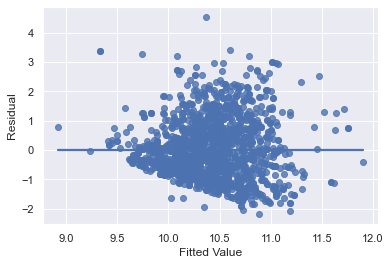

In [290]:
sns.regplot(x=results.fittedvalues, y=results.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

**<u>Condition 2</u>: Constant Variability of Residuals Condition**

Because the y-axis spread of points in the plot below changes as we move from left to right, we can say that this condition is not met.

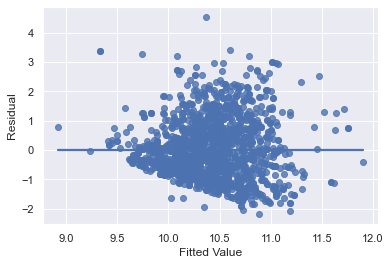

In [291]:
sns.regplot(x=results.fittedvalues, y=results.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

**<u>Condition 3</u>: Normality of Residuals (with Mean of 0) Condition**

Because the histogram of residuals is slightly skewed to the right, the assumption that the residuals are normally distributed is slightly not met. (However, it does look like the mean is about 0).

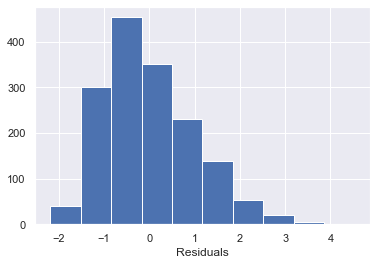

In [292]:
plt.hist(results.resid)
plt.xlabel('Residuals')
plt.show()

**<u>Condition 4 </u>Independence of Residuals Condition**

At the very least, we verify that:
* the data is randomly sampled and
* the sample size n=1599 which is less than 10% of all red wines.

Thus the condition for independence of residuals may not be violated in this particular way.

**<u>Condition 5</u>: No Multicollinearity Condition**

As show by the correlation heatmap below, there is a string correlation among citric acid and sulphates and citric acid and pH. Therefore the multicollinearity condition is not met. To improve the model, citric_acid should be dropped. 

<AxesSubplot:>

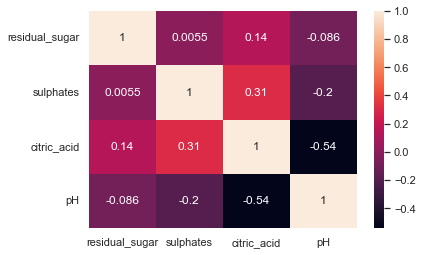

In [293]:
sns.heatmap(df[interests].corr(), annot=True)

In [294]:
#New model with citric acid dropped!
new_results = smf.ols('alcohol ~ residual_sugar+sulphates+pH', data=df).fit()
new_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                alcohol   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     36.81
Date:                Wed, 03 May 2023   Prob (F-statistic):           5.33e-23
Time:                        23:02:21   Log-Likelihood:                -2316.6
No. Observations:                1599   AIC:                             4641.
Df Residuals:                    1595   BIC:                             4663.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.2741      0.601      7.106      0.000       3.094       5.454
residual_sugar     0.0467      0.018      2.540      0.011       0.011       0.083
sulphates          0.8811      0.155      5.674      0.000       0.577       1.186
pH                 1.6461      0.171      9.620      0.000       1.311       1.982
==============================================================================
Omnibus:                      136.301   Durbin-Watson:                   1.452
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.228
Skew:                           0.797   Prob(JB):                     6.58e-38
Kurtosis:                       3.179   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* **New Equation for Multi-Linear Regression Model:**
    * $\hat{y}= 4.2741 + 0.0467(residual sugar) + 0.8811(sulphates) + 1.6461(pH)$
        * (Note Citric Acid was dropped as a variable in the model)

* **C4, percent of variability in your response variable is explained by this model in the dataset**
    * Since R-squared is equal to 0.065, then that means that 6.5 of  variability in your response variable is explained by this model in the dataset. This is a terribly low r-squared and shows that my model is not the best.

* **C5: Prediction with my model:** If I have a residual sugar content of 3, sulphate content of 0.49, and pH of 3.0, what is the predicted alcohol content?

In [295]:
pred = 4.2741 + 0.0467*(3.0) + 0.8811*(0.49) + 1.6461*(3.0)
print(f'Predicted Alochol Content {pred} %')


Predicted Alochol Content 9.784239 %


* **C6, Which slopes in your model do we have sufficient evidence to suggest are
non-zero in the population model?:**
    * $H_0:$ $\beta_1=\beta_2=\beta_3 =0$
    * $H_A:$ at least one $\beta_i\neq 0$ (for $i=1,2,3$)

 Based on my model summary since the p-value for all slopes is less than our significance level of 0.05, we reject the null hypothesis. Thus there is sufficient evidence to suggest that the population slope for i in this model is non-zero. Where i corresponds to residual sugar, pH, and sulphate content.

**Finally, discuss how your linear regression analysis helps answer your research question:** 
* **Research Question:** “Is there a linear relationship between alcohol content and 'residual sugar', 'sulphates', 'citric acid', and 'pH'in the sample? What about in the relevant population?”
    
* my linear regression analysis allowed for the creation of a model to predict the alcohol content of red wine based on these characteristics. The analysis revealed multicollinearity between citric acid and pH and sulphate content. However, the low R-squared value of 6.5% suggests that these explanatory variables, together, do not provide a good basis for predicting alcohol content in red wine. Moreover, these findings have implications for the production of high alcohol content red wine. Based on this model, it can be inferred that focusing on the levels of residual sugar, sulphates, citric acid, and pH is not likely to lead to an increase in alcohol content. Instead, other attributes may need to be considered in the wine production process to achieve this goal.


## 5. Logistic Regression

### **Logistic Regression Question:** What explanatory variables should we include in the model to build a parsimonious model? Is there a linear relationship between the log-odds of the success level of the red wine being high quality and its explanatory variables in the sample? in the relevant population? 

* **A1.i. Variables of Interest:**
    * **Response: Wine Classification (High or Low)**
    * **Explanatory Variables:** Sulphates, Citric acid, Total Sulfur dioxide, pH, Alcohol 

In [296]:
#A.1: Creation of the Categorical reponse Variable with two levels.  
df['is_high_quality'] = [1 if x > 6 else 0 for x in df.quality]
# display(df_train['alcohol_level'].value_counts())


In [297]:
# C.1: Splitting muy dataset into testing and training datasets.
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, 
                                   test_size=0.20, 
                                   random_state=2)
print(f'Training Data: {round((100*(len(df_train)/len(df))),1)} % of Original Datasets')
print(f'Testing Data: {round((100*(len(df_test)/len(df))),1)}  % of Original Dataset')

Training Data: 80.0 % of Original Datasets
Testing Data: 20.0  % of Original Dataset


In [298]:
#C.2: Performing a backwards elmination algorithmn (using BIC) to find a parsimonious model.
# Here is the full model, with the selected repsonse and explanatory variables 
mod_full = smf.logit('is_high_quality ~ alcohol+sulphates+total_sulfur_dioxide+citric_acid+pH', data=df_train).fit()
print('ITERATION 1: BIC of the Current Model', mod_full.bic.round(3))


Optimization terminated successfully.
         Current function value: 0.290836
         Iterations 8
ITERATION 1: BIC of the Current Model 786.88


In [299]:
print('Iteration 1 of Backwards Elimination')
print('-----------------------------------------------------------')
#remove sulphates
test_mod=smf.logit('is_high_quality ~ alcohol+total_sulfur_dioxide+citric_acid+pH', data=df_train).fit()
print('ITERATION 2: BIC of the Test Model with Sulphates Dropped',test_mod.bic.round(3))
#remove Total Sulfur Dioxide 
test_mod=smf.logit('is_high_quality ~ alcohol+sulphates+citric_acid+pH', data=df_train).fit()
print('ITERATION 3: BIC of the Test Model with Total Sulfur Dioxide Dropped',test_mod.bic)
#remove Citric Acid
test_mod=smf.logit('is_high_quality ~ alcohol+sulphates+total_sulfur_dioxide+pH', data=df_train).fit()
print('ITERATION 4: BIC of the Test Model with Citric Acid Dropped ',test_mod.bic)
#removes pH
test_mod=smf.logit('is_high_quality ~ alcohol+sulphates+total_sulfur_dioxide+citric_acid', data=df_train).fit()
print('ITERATION 5: BIC of the Test Model, with pH Dropped',test_mod.bic.round(3))
#removes alcohol
test_mod=smf.logit('is_high_quality ~ sulphates+total_sulfur_dioxide+citric_acid', data=df_train).fit()
print('ITERATION 6: BIC of the Test Model, with Alcohol Dropped',test_mod.bic)

Iteration 1 of Backwards Elimination
-----------------------------------------------------------
Optimization terminated successfully.
         Current function value: 0.303195
         Iterations 7
ITERATION 2: BIC of the Test Model with Sulphates Dropped 811.342
Optimization terminated successfully.
         Current function value: 0.296527
         Iterations 7
ITERATION 3: BIC of the Test Model with Total Sulfur Dioxide Dropped 794.2841504737205
Optimization terminated successfully.
         Current function value: 0.294616
         Iterations 8
ITERATION 4: BIC of the Test Model with Citric Acid Dropped  789.3974507829219
Optimization terminated successfully.
         Current function value: 0.290877
         Iterations 8
ITERATION 5: BIC of the Test Model, with pH Dropped 779.833
Optimization terminated successfully.
         Current function value: 0.357197
         Iterations 7
ITERATION 6: BIC of the Test Model, with Alcohol Dropped 942.3240475873185


* Because there was at least one "test model" that has a **BIC score (779.833) that is lower than the BIC score of the current model (786.88)**, we continue on to next step in the backwards elimination algorithm.

* The **"test model" (from the first iteration) that had the lowest BIC score was the one that deleted the "pH" explanatory variable from the "current model"**. So we set the new "current model" to be the test model that does not include the "pH" variable and we continue another iteration of the algorithm.

In [300]:
current_mod=smf.logit('is_high_quality ~ alcohol+sulphates+total_sulfur_dioxide+citric_acid', data=df_train).fit()
print('ITERATION 1: BIC of the Current Model',current_mod.bic.round(3))

Optimization terminated successfully.
         Current function value: 0.290877
         Iterations 8
ITERATION 1: BIC of the Current Model 779.833


In [301]:
print('Iteration 2 of Backwards Elimination')
print('-----------------------------------------------------------')
#Remove sulphates
test_mod=smf.logit('is_high_quality ~ alcohol+total_sulfur_dioxide+citric_acid', data=df_train).fit()
print('ITERATION 1, Sulphates Dropped: BIC of the Current Model',test_mod.bic)
#Remove total_sulfur_dioxide
test_mod=smf.logit('is_high_quality ~ alcohol+sulphates+citric_acid', data=df_train).fit()
print('ITERATION 2, total_sulfur_dioxide Dropped: BIC of the Current Model',test_mod.bic)
#remove citric acid
test_mod=smf.logit('is_high_quality ~ alcohol+sulphates+total_sulfur_dioxide', data=df_train).fit()
print('ITERATION 3, Citric Acid Dropped: BIC of the Current Model',test_mod.bic)
#remove citric acid
test_mod=smf.logit('is_high_quality ~ sulphates+total_sulfur_dioxide+citric_acid', data=df_train).fit()
print('ITERATION 4, Alcohol Level Dropped: BIC of the Current Model',test_mod.bic)

Iteration 2 of Backwards Elimination
-----------------------------------------------------------
Optimization terminated successfully.
         Current function value: 0.303408
         Iterations 7
ITERATION 1, Sulphates Dropped: BIC of the Current Model 804.7326283904025
Optimization terminated successfully.
         Current function value: 0.296599
         Iterations 7
ITERATION 2, total_sulfur_dioxide Dropped: BIC of the Current Model 787.3143606960564
Optimization terminated successfully.
         Current function value: 0.297593
         Iterations 8
ITERATION 3, Citric Acid Dropped: BIC of the Current Model 789.8588336093813
Optimization terminated successfully.
         Current function value: 0.357197
         Iterations 7
ITERATION 4, Alcohol Level Dropped: BIC of the Current Model 942.3240475873185


Because there were no "test models" that had a lower than the BIC score of the current model (779.833), we STOP THE backwards elimination ALGORITHM and we return the "current model" (with Sulphates, Citric acid, Total Sulfur dioxide, Alcohol  as explanatory variables) as our "final model."

In [302]:
# Final Logistic Regression Model
current_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        is_high_quality   No. Observations:                 1279
Model:                          Logit   Df Residuals:                     1274
Method:                           MLE   Df Model:                            4
Date:                Wed, 03 May 2023   Pseudo R-squ.:                  0.2739
Time:                        23:02:24   Log-Likelihood:                -372.03
converged:                       True   LL-Null:                       -512.36
Covariance Type:            nonrobust   LLR p-value:                 1.604e-59
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -15.6827      1.163    -13.490      0.000     -17.961     -13.404
alcohol                  1.0757      0.091     11.776      0.000       0.897       1.255
sulphates                3.0082      0.514      5.850      0.000       2.000       4.016
total_sulfur_dioxide    -0.0137      0.004     -3.507      0.000      -0.021      -0.006
citric_acid              2.0271      0.496      4.091      0.000       1.056       2.998
========================================================================================
"""

**C5. Equation for Fitted Model**:  $log(\frac{\hat{p}}{1-\hat{p}} ) = -15.6827 + 1.0757(alcohol) + 3.0082(sulphates) + -0.0137(total_sulfur_dioxide) + 2.0271(citric_acid)$

**C6.Hypothesis Testing** Because the p-value for all slopes is less than our significance level of 0.05, we reject the null hypothesis. Thus there is sufficient evidence to suggest that the population slope for i in this model is non-zero. Where i corresponds to Alcohol, Sulphates, Total Sulfur Dioxide, and Citric Acid content in our model.


In [303]:
from scipy.stats import norm
test_statistic=-3.507
pvalue=2*(1-norm.cdf(np.abs(test_statistic)))
print('p-value of Sulfur:', pvalue)
test_statistic=11.776	
pvalue=2*(1-norm.cdf(np.abs(test_statistic)))
print('p-value of Alcohol:', pvalue)
test_statistic = 5.850
pvalue=2*(1-norm.cdf(np.abs(test_statistic)))
print('p-value of Sulphates:', pvalue)
test_statistic = 4.091
pvalue=2*(1-norm.cdf(np.abs(test_statistic)))
print('p-value of Citric Acid:', pvalue)

p-value of Sulfur: 0.0004531891485679562
p-value of Alcohol: 0.0
p-value of Sulphates: 4.915730045240707e-09
p-value of Citric Acid: 4.295171315837898e-05


In [304]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [305]:
pred_probabilities=current_mod.predict(exog=dict(df_train)) 
df_train['predictive_prob']=pred_probabilities

0.869


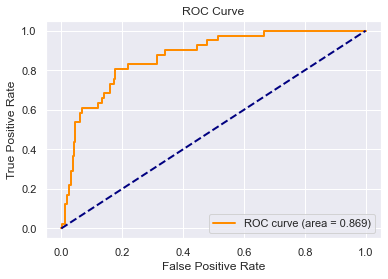

In [306]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

auc = roc_auc_score(y_true=df_train['is_high_quality'], y_score=current_mod.fittedvalues)
df_test['pred_prob2'] = current_mod.predict(exog=dict(df_test))
fprs, tprs, thresholds = roc_curve(y_true=df_test['is_high_quality'], y_score=df_test['pred_prob2'])

auc = roc_auc_score(y_true=df_test['is_high_quality'],y_score=df_test['pred_prob2'])
print(auc.round(3))
plot_roc(fprs, tprs, auc)

In [307]:
df_test['pred_prob2']=current_mod.predict(exog=dict(df_test)) 
def tpr_fpr_thresh(y, pred_prob, thresh):
    yhat = 1*(pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true=y, y_pred=yhat).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    return pd.DataFrame({'threshold':[thresh],'tpr':[tpr],'fpr':[fpr]})

for thresh in np.arange(0,1,.1):
    print(tpr_fpr_thresh(df_test['is_high_quality'], df_test['pred_prob2'], thresh))

   threshold  tpr  fpr
0        0.0  1.0  1.0
   threshold       tpr       fpr
0        0.1  0.878049  0.336918
   threshold       tpr       fpr
0        0.2  0.804878  0.175627
   threshold       tpr       fpr
0        0.3  0.609756  0.103943
   threshold       tpr       fpr
0        0.4  0.512195  0.046595
   threshold       tpr       fpr
0        0.5  0.268293  0.032258
   threshold       tpr      fpr
0        0.6  0.195122  0.02509
   threshold       tpr       fpr
0        0.7  0.121951  0.014337
   threshold      tpr       fpr
0        0.8  0.02439  0.007168
   threshold  tpr       fpr
0        0.9  0.0  0.003584


In [308]:
for thresh in np.arange(0.1,.2,.01):  
    print(tpr_fpr_thresh(df_test['is_high_quality'], df_test['pred_prob2'], thresh))

   threshold       tpr       fpr
0        0.1  0.878049  0.336918
   threshold       tpr       fpr
0       0.11  0.878049  0.318996
   threshold       tpr       fpr
0       0.12  0.829268  0.290323
   threshold       tpr      fpr
0       0.13  0.829268  0.27957
   threshold       tpr       fpr
0       0.14  0.829268  0.258065
   threshold       tpr       fpr
0       0.15  0.829268  0.236559
   threshold       tpr       fpr
0       0.16  0.829268  0.222222
   threshold       tpr       fpr
0       0.17  0.804878  0.207885
   threshold       tpr       fpr
0       0.18  0.804878  0.193548
   threshold       tpr       fpr
0       0.19  0.804878  0.189964


In [309]:
for thresh in np.arange(0.11,0.12,.001):
    print(tpr_fpr_thresh(df_test['is_high_quality'], df_test['pred_prob2'], thresh))



   threshold       tpr       fpr
0       0.11  0.878049  0.318996
   threshold       tpr       fpr
0      0.111  0.878049  0.318996
   threshold       tpr       fpr
0      0.112  0.878049  0.315412
   threshold       tpr       fpr
0      0.113  0.829268  0.308244
   threshold       tpr       fpr
0      0.114  0.829268  0.304659
   threshold       tpr       fpr
0      0.115  0.829268  0.304659
   threshold       tpr       fpr
0      0.116  0.829268  0.304659
   threshold       tpr       fpr
0      0.117  0.829268  0.297491
   threshold       tpr       fpr
0      0.118  0.829268  0.290323
   threshold       tpr       fpr
0      0.119  0.829268  0.290323


* Using this ROC Curve and its thresholds, the best point for a threshold is between 0.110 and 0.111. These are a set of thresholds that I could use for a classifier that
corresponds to the best fpr and tpr identified from the ROC curves above.

* My classifier would use my parsimonious model to estimate the predictive probabilities, and use a predictive probability
threshold of anywhere between  0.110 and 0.112. For ease, I might select 0.246. Note that this selection of a threshold, especially going to the thousands, may be too specific to my data. However, it does seem to have the optimal performance (highest tpr with lowest fpr) that I could find.

In [310]:
df_test['yhat']=1*(df_test['pred_prob2']>0.112)
tn, fp, fn, tp = confusion_matrix(y_true=df_test['is_high_quality'], 
                                  y_pred=df_test['yhat']).ravel()
(tn, fp, fn, tp)

sensitivity=tp/(tp+fn)
print('Sensitivity:', sensitivity.round(3))
specificity=tn/(tn+fp)
print('Specificity:', specificity.round(3))
false_positive_rate=fp/(tn+fp)
print('False Positive rate:', false_positive_rate.round(3))

Sensitivity: 0.878
Specificity: 0.685
False Positive rate: 0.315


* d. Finally, discuss how your logistic regression analysis helps answer your research question.

### **Logistic Regression Question:** What explanatory variables should we include in the model to build a parsimonious model? Is there a linear relationship between the log-odds of the success level of the red wine being high quality and its explanatory variables in the sample? in the relevant population? 

* Through my logistic regression analysis, I was able to develop a concise model that accurately predicts whether red wine is of high or low quality. By utilizing both training and testing datasets, I used a backwards elimination approach based on the Bayesian information criterion (BIC) to identify the most relevant explanatory variables: sulphates, citric acid, total sulfur dioxide, and alcohol content. This parsimonious model has an AUC of 0.869, indicating a significant improvement over random guessing. To further assess the model's performance, I generated a ROC curve with the testing data and determined an optimal predictive probability threshold of 0.112. With a sensitivity of 0.878 and a low false positive rate of 0.315, this model is highly effective at classifying wine quality.Furthermore, my hypothesis test revealed that the population slopes for alcohol, sulphates, total sulfur dioxide, and citric acid are non-zero, providing further evidence for the importance of these variables in predicting wine quality. Overall, this analysis offers valuable insights into the most critical factors in determining the quality of red wine.

## 6. Conclusion

Summarization: Summarize the findings of your individual research questions in the conclusion. Provide at least a paragraph. (This will likely be a restatement of what you have already included in your report).
b. Future work: If you (or someone else) were to conduct future work based on these analyses, what kind of research questions or analyses might that entail?

A. The analysis performed in this study provide valuable insights into the factors that are most critical for producing high-quality red wine. The correlation heatmap and scatterplot visualization indicate that alcohol, sulphates, and citric acids are highly correlated with wine quality, with sulphate and alcohol content having a positive, weak relationship. In addition, my summary statistics further support these findings, emphasizing the importance of carefully controlling the levels of these attributes during the wine-making process to produce wines of superior quality. These insights can be especially valuable for businesses in the wine industry looking to position themselves as high-quality brands.

The linear and logistic regression analyses offer additional insights into the relationships between physicochemical attributes and wine quality. The low R-squared value of the linear regression model suggests that focusing solely on residual sugar, sulphates, citric acid, and pH is not likely to increase the alcohol content of red wine. Instead, other attributes may need to be considered in the wine production process to achieve this goal. The logistic regression model, on the other hand, provides a concise and effective means of predicting wine quality, with the identified variables of sulphates, citric acid, total sulfur dioxide, and alcohol content being the most critical in determining wine quality. Overall, the insights gained from these analyses can inform winemakers and businesses in the wine industry in optimizing their production processes to produce high-quality wine products.

B. Based on the finding from the hypothesis testing, which suggests that there is a difference in the population means of alcohol content between wines of low and high quality, future work would benefit from exploring the specific processes and quality factors that contribute to higher alcohol content in wine, such as the ageing and fermentation process. This deeper analysis could uncover additional insights into the production of high-quality red wine and could provide practical guidance for winemakers seeking to improve the alcoholic content of their wines. Moreover, this research could be extended to explore how the influence of other physicochemical attributes, such as residual sugar or acidity, could impact alcohol content and overall wine quality. 